In [1]:
!pip install finance-datareader

In [2]:
import pandas as pd
# 무시
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

In [3]:
import FinanceDataReader as fdr
df = fdr.DataReader('247540', '2019') # 247540(에코프로비엠) / 005930(삼성전자) / 373220(lg에너지솔루션) / 112040(위메이드)
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN
2019-03-06,15911,17196,15738,16975,6007950,0.087026
2019-03-07,17369,17888,17097,17296,4126721,0.018910
2019-03-08,17295,17493,16702,17271,1910858,-0.001445
2019-03-11,17196,17369,16332,17098,1597077,-0.010017


<AxesSubplot: xlabel='Date'>

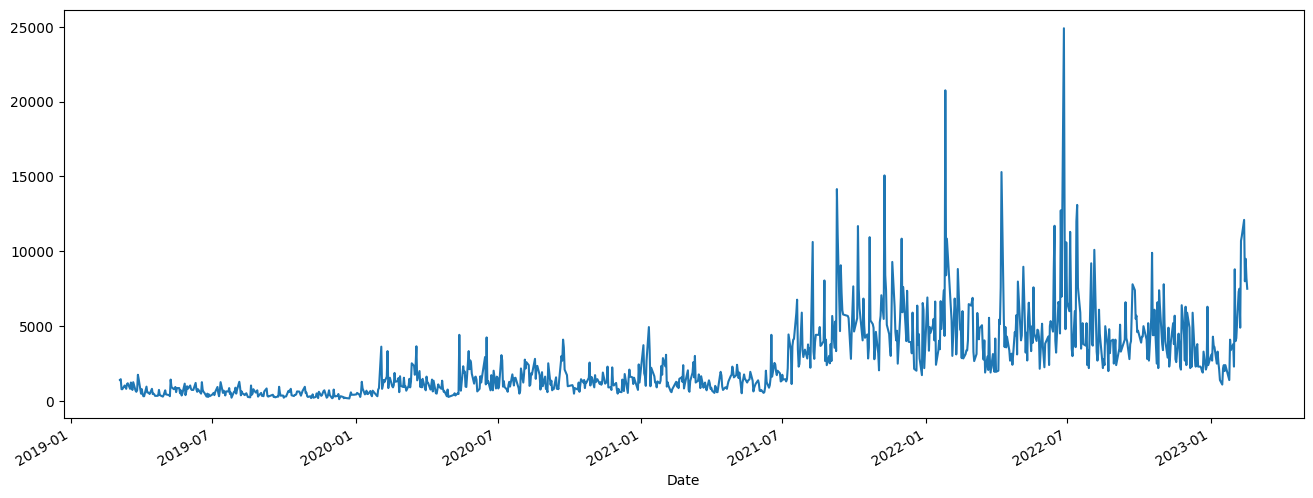

In [4]:
(df['High'] - df['Low']).plot(figsize = (16, 6))

In [ ]:
# HIGH - LOW 가 크다 vs HIGH - LOW 가 작다.

<AxesSubplot: xlabel='Date'>

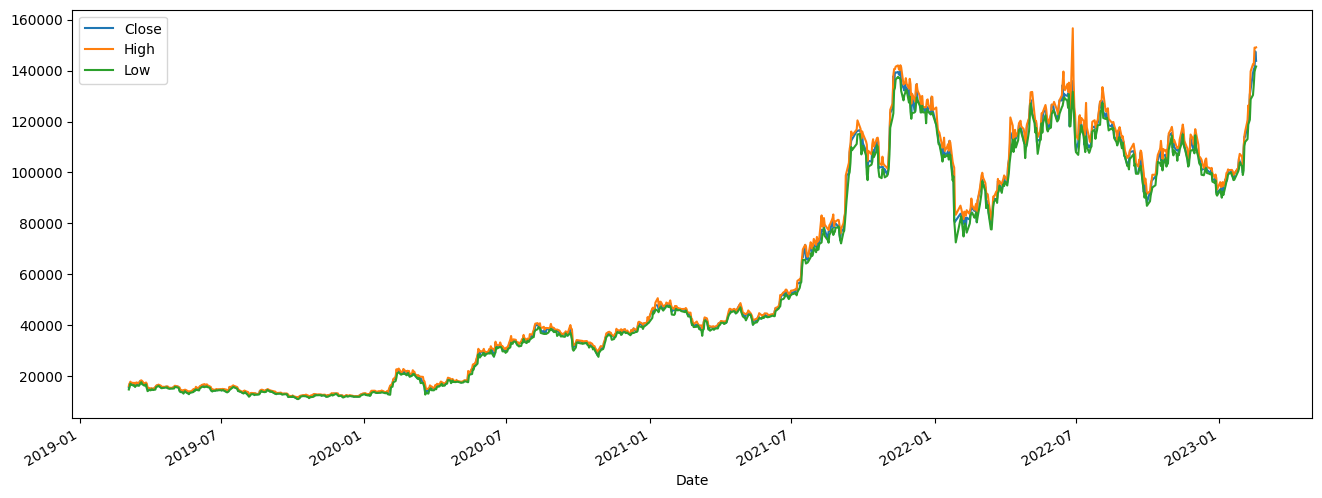

In [5]:
# 주식의 가격이 오른다(시장경제) -> 매수량이 많다.
# 사려는 사람이 많다 -> 미래에도 오를 것이다. -> 원하는 사람이 많다.
df[['Close', 'High', 'Low']].plot(figsize = (16,6))

In [6]:
df['Range'] = df['High'] - df['Low']
df['yesterday_Range'] = df['Range'].shift()
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range
Date,,,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN,1408,NaN
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0


In [7]:
# 시가 대비 전날 변동성에서 절반 이상 상승 -> 사려는 사람이 많다.
df['Buy_Price'] = df['Open'] + df['yesterday_Range'] * 0.5
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price
Date,,,,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN,1408,NaN,NaN
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5


In [8]:
df = df.dropna()

In [9]:
import numpy as np
df['Buy_Signal'] = np.where(df['High'] >= df['Buy_Price'], 1, 0)
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_Signal
Date,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,1
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0,0
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5,0
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5,0
2019-03-12,17147,17419,16480,16604,1356933,-0.028892,939,1037.0,17665.5,0


In [10]:
df['Return'] = np.where(df['Buy_Signal'] == 1, df['Close']-df['Buy_Price'], None)
df['rate_of_return'] = np.where(df['Buy_Signal'] == 1, (df['Close'] / df['Buy_Price']) - 1, None)
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_Signal,Return,rate_of_return
Date,,,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,1,360.0,0.021667
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0,0,None,None
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5,0,None,None
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5,0,None,None
2019-03-12,17147,17419,16480,16604,1356933,-0.028892,939,1037.0,17665.5,0,None,None


In [11]:
df['cum_ror'] = (df['rate_of_return'] + 1).cumprod() - 1
df.tail()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_Signal,Return,rate_of_return,cum_ror
Date,,,,,,,,,,,,,
2023-02-13,132600,142500,130400,139000,3447025,0.047476,12100,11000.0,138100.0,1,900.0,0.006517,3.611204
2023-02-14,141900,142300,134300,140500,2241781,0.010791,8000,12100.0,147950.0,0,None,None,NaN
2023-02-15,142500,149000,139500,141100,3489156,0.004270,9500,8000.0,146500.0,1,-5400.0,-0.03686,3.441235
2023-02-16,145500,149000,140800,147500,2350333,0.045358,8200,9500.0,150250.0,0,None,None,NaN
2023-02-17,144000,149100,141600,143800,1425541,-0.025085,7500,8200.0,148100.0,1,-4300.0,-0.029034,3.312286


In [12]:
start_date = df.index[0]
end_date = df.index[-1]
year = (end_date - start_date).days / 365
year

3.956164383561644

In [13]:
last_cum_ror = df['cum_ror'].dropna(axis = 0).iloc[-1]

CAGR = (1 + last_cum_ror) ** (1/year) - 1
print(f'CAGR : {round(CAGR * 100, 2)} %')

CAGR : 44.69 %


### Buy & Hold vs 변동성 돌파

In [14]:
buy_and_hold = df[['Close']]
buy_and_hold.head()

,Close
Date,
2019-03-06,16975
2019-03-07,17296
2019-03-08,17271
2019-03-11,17098
2019-03-12,16604


In [15]:
buy_and_hold['rate_of_return'] = buy_and_hold['Close'].pct_change() # 수익률
buy_and_hold['cum_ror'] = (buy_and_hold['rate_of_return'] + 1).cumprod() - 1 # 누적수익률

start_date = buy_and_hold.index[0]
end_date = buy_and_hold.index[-1]
year = (end_date - start_date).days / 365

last_cum_ror = buy_and_hold['cum_ror'].dropna(axis = 0).iloc[-1]

buy_and_hold_CAGR = (1 + last_cum_ror) ** (1/year) - 1
print(f'CAGR : {round(buy_and_hold_CAGR * 100, 2)} %')

CAGR : 71.62 %


In [16]:
df.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,Buy_Signal,Return,rate_of_return,cum_ror
Date,,,,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,1,360.0,0.021667,0.021667
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0,0,None,None,NaN
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5,0,None,None,NaN
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5,0,None,None,NaN
2019-03-12,17147,17419,16480,16604,1356933,-0.028892,939,1037.0,17665.5,0,None,None,NaN


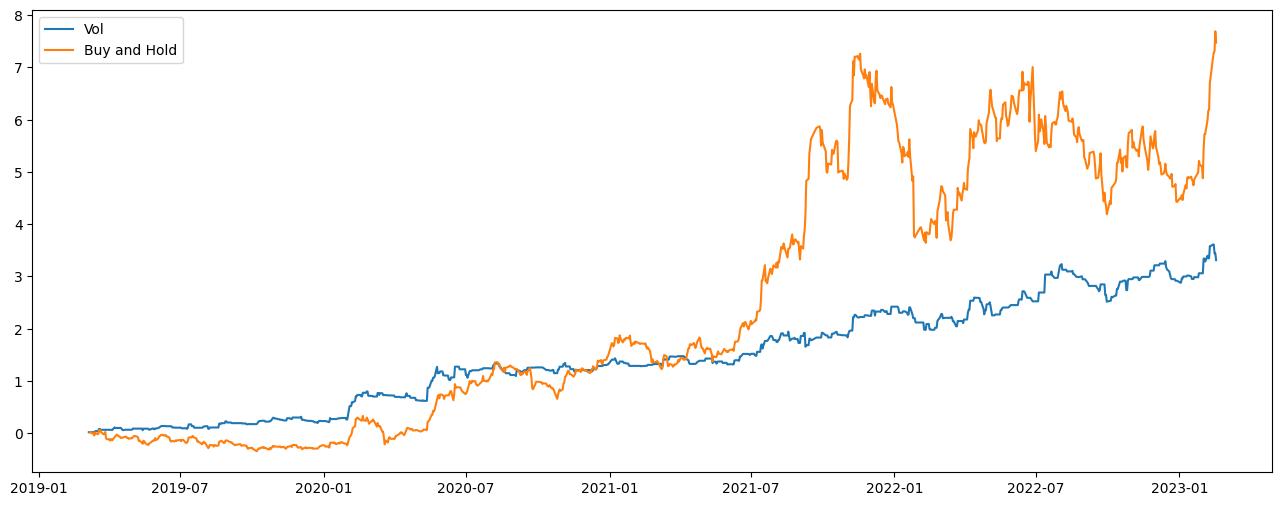

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,6))
plt.plot(df.index, df['cum_ror'].fillna(method = 'ffill'), label = 'Vol')
plt.plot(buy_and_hold.index, buy_and_hold['cum_ror'], label = 'Buy and Hold')
plt.legend()

# 이동평균으로 상승장 여부를 판단하여 전략 수정

In [18]:
rising_df_buy = df[df['Buy_Signal'] == 1].loc[:,:'Buy_Price']
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price
Date,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0
2019-03-14,16554,17468,16332,17296,2820362,0.060584,1136,815.0,16961.5
2019-03-19,16875,17962,16727,17963,3981717,0.075436,1235,816.0,17283.0
2019-03-21,17839,18407,17666,18037,2560413,0.022390,741,890.0,18284.0
2019-03-27,17122,17542,16826,17419,1186907,0.032176,716,618.0,17431.0


In [20]:
rising_df_buy['MA10'] = rising_df_buy['Close'].rolling(10, min_periods = 1).mean()
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10
Date,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,16975.000000
2019-03-14,16554,17468,16332,17296,2820362,0.060584,1136,815.0,16961.5,17135.500000
2019-03-19,16875,17962,16727,17963,3981717,0.075436,1235,816.0,17283.0,17411.333333
2019-03-21,17839,18407,17666,18037,2560413,0.022390,741,890.0,18284.0,17567.750000
2019-03-27,17122,17542,16826,17419,1186907,0.032176,716,618.0,17431.0,17538.000000


<AxesSubplot: xlabel='Date'>

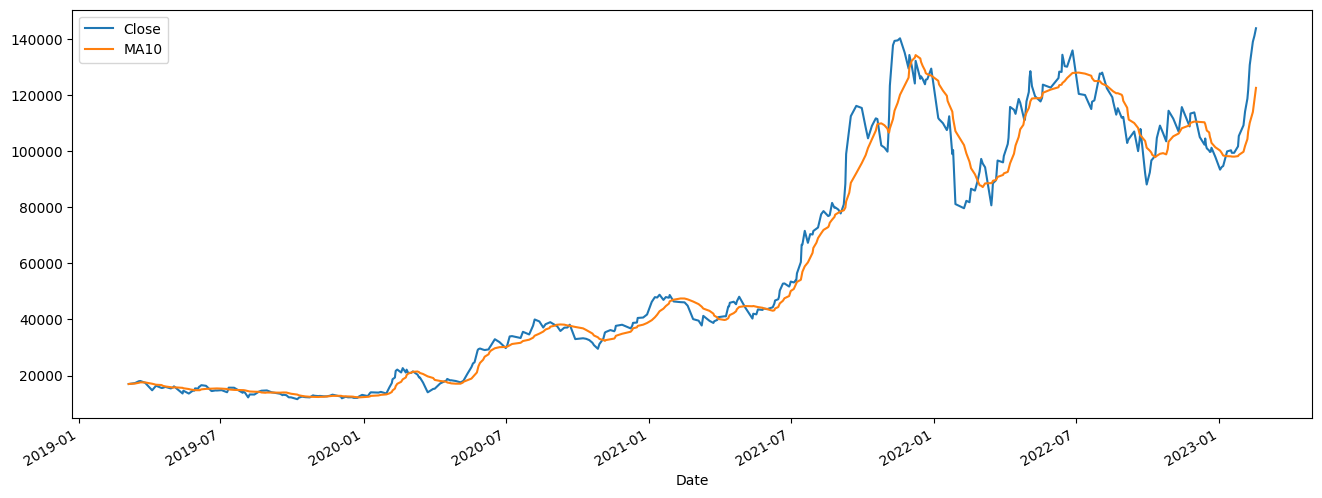

In [21]:
# 이동평균을 활용해서 어떤 날이 상승날인지 알아보기
# 종가를 활용해서! 
# 그래프 그리면 어떻게 해야되는지 잘 파악할 수 있음!
rising_df_buy[['Close', 'MA10']].plot(figsize=(16,6))

In [22]:
rising_df_buy['is_uptrend'] = np.where(rising_df_buy['MA10'] <= rising_df_buy['Close'], True, None)
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10,is_uptrend
Date,,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,16975.000000,True
2019-03-14,16554,17468,16332,17296,2820362,0.060584,1136,815.0,16961.5,17135.500000,True
2019-03-19,16875,17962,16727,17963,3981717,0.075436,1235,816.0,17283.0,17411.333333,True
2019-03-21,17839,18407,17666,18037,2560413,0.022390,741,890.0,18284.0,17567.750000,True
2019-03-27,17122,17542,16826,17419,1186907,0.032176,716,618.0,17431.0,17538.000000,None


In [ ]:
# 아까 상승장일때 hold하지 않아서 더 수익 못봤음 >> 이런걸 통해서 우리가 얻은 insight
# 상승장 True -> Hold 
# 상승장 False -> 그대로

In [23]:
uptrend_cond = (rising_df_buy['is_uptrend'] == True) # condition
uptrend_cond.head(3)

Date
2019-03-06    True
2019-03-14    True
2019-03-19    True
Name: is_uptrend, dtype: bool

In [24]:
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10,is_uptrend
Date,,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,16975.000000,True
2019-03-14,16554,17468,16332,17296,2820362,0.060584,1136,815.0,16961.5,17135.500000,True
2019-03-19,16875,17962,16727,17963,3981717,0.075436,1235,816.0,17283.0,17411.333333,True
2019-03-21,17839,18407,17666,18037,2560413,0.022390,741,890.0,18284.0,17567.750000,True
2019-03-27,17122,17542,16826,17419,1186907,0.032176,716,618.0,17431.0,17538.000000,None


In [26]:
uptrend_cond = (rising_df_buy['is_uptrend'] == True) & (
    rising_df_buy['High'] >= rising_df_buy['Buy_Price'])
uptrend_trade_ror = (rising_df_buy['Close'] / rising_df_buy['Open']) -1
default_trade_ror = (rising_df_buy['Close'] / rising_df_buy['Buy_Price']) -1

In [28]:
# 상승장 True -> Hold -> Opend에 사서 Close에 판다
# 상승장 None -> 그대로 -> Target price 에 사서 Close에 판다
rising_df_buy['uptrend_ror'] = np.where(uptrend_cond, uptrend_trade_ror, default_trade_ror)
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10,is_uptrend,uptrend_ror
Date,,,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,16975.000000,True,0.066872
2019-03-14,16554,17468,16332,17296,2820362,0.060584,1136,815.0,16961.5,17135.500000,True,0.044823
2019-03-19,16875,17962,16727,17963,3981717,0.075436,1235,816.0,17283.0,17411.333333,True,0.064474
2019-03-21,17839,18407,17666,18037,2560413,0.022390,741,890.0,18284.0,17567.750000,True,0.011099
2019-03-27,17122,17542,16826,17419,1186907,0.032176,716,618.0,17431.0,17538.000000,None,-0.000688


In [29]:
rising_df_buy['cum_ror'] = (rising_df_buy['uptrend_ror'] + 1).cumprod() - 1
rising_df_buy.head()

,Open,High,Low,Close,Volume,Change,Range,yesterday_Range,Buy_Price,MA10,is_uptrend,uptrend_ror,cum_ror
Date,,,,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,16975.000000,True,0.066872,0.066872
2019-03-14,16554,17468,16332,17296,2820362,0.060584,1136,815.0,16961.5,17135.500000,True,0.044823,0.114692
2019-03-19,16875,17962,16727,17963,3981717,0.075436,1235,816.0,17283.0,17411.333333,True,0.064474,0.186561
2019-03-21,17839,18407,17666,18037,2560413,0.022390,741,890.0,18284.0,17567.750000,True,0.011099,0.199731
2019-03-27,17122,17542,16826,17419,1186907,0.032176,716,618.0,17431.0,17538.000000,None,-0.000688,0.198905


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,6))
plt.plot(df.index, df['cum_ror'].fillna(method = 'ffill'), label = 'Vol')
plt.plot(buy_and_hold.index, buy_and_hold['cum_ror'], label = 'Buy and Hold')
plt.plot(rising_df_buy.index, rising_df_buy['uptrend_ror'], label = 'Uptrend') 
plt.legend()